## 한글 폰트 설치

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## data

In [3]:
import pandas as pd
import numpy as np

In [4]:
import pymongo

client = pymongo.MongoClient("192.168.10.240", 27017)
db = client['AI_LKJ']
collection_data_tour_pass_info = db['data_tour_pass_info']

data_tour_pass_package = collection_data_tour_pass_info.find()
df_tourpackage = pd.DataFrame(data_tour_pass_package)

# https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=b44da660-5892-11ec-8ee4-95f65f846b27

In [5]:
df_tourpackage

,_id,RESPOND_ID,EXAMIN_YM,SEXDSTN_FLAG_CD,AGRDE_FLAG_NM,ANSWRR_OC_AREA_NM,HSHLD_INCOME_DGREE_NM,DMSTC_TOUR_TY_VALUE,OVSEA_TOUR_TY_VALUE
0,6641a632efcef51976225202,2784473,202101,M,50대,충청북도,500이상700만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음
1,6641a632efcef51976225203,3093132,202101,M,20대,대구광역시,모름,단체 패키지 여행,여행경험없음
2,6641a632efcef51976225204,2968180,202101,F,40대,전라북도,500이상700만원 미만,개별 여행,여행경험없음
3,6641a632efcef51976225205,196273,202101,F,30대,대구광역시,500이상700만원 미만,개별 여행,여행경험없음
4,6641a632efcef51976225206,1922037,202101,F,60대,부산광역시,300이상500만원 미만,개별 여행,여행경험없음
...,...,...,...,...,...,...,...,...,...
54320,6641a840efcef51976232632,53377191,202312,F,50대,경기도,700만원 이상,개별 여행,여행경험없음
54321,6641a840efcef51976232633,53377219,202312,F,50대,인천광역시,700만원 이상,여행경험없음,단체 패키지 여행
54322,6641a840efcef51976232634,53377331,202312,M,60대,서울특별시,300만원 미만,개별 여행,여행경험없음
54323,6641a840efcef51976232635,53377450,202312,F,30대,경기도,모름,개별 여행,여행경험없음


|컬럼영문명|컬럼한글명|
|--|--|
|RESPOND_ID|응답자ID|
|EXAMIN_YM|조사년월|
|SEXDSTN_FLAG_CD|성별구분코드|
|AGRDE_FLAG_NM|연령대구분명|
|ANSWRR_OC_AREA_NM|답변자거주지역명|
|HSHLD_INCOME_DGREE_NM|가구소득정도명|
|DMSTC_TOUR_TY_VALUE|국내여행유형값|
|OVSEA_TOUR_TY_VALUE|해외여행유형값|

In [6]:
df_tourpackage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54325 entries, 0 to 54324
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    54325 non-null  object
 1   RESPOND_ID             54325 non-null  int64 
 2   EXAMIN_YM              54325 non-null  int64 
 3   SEXDSTN_FLAG_CD        54325 non-null  object
 4   AGRDE_FLAG_NM          54325 non-null  object
 5   ANSWRR_OC_AREA_NM      54325 non-null  object
 6   HSHLD_INCOME_DGREE_NM  54325 non-null  object
 7   DMSTC_TOUR_TY_VALUE    54325 non-null  object
 8   OVSEA_TOUR_TY_VALUE    54325 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


In [7]:
df_tourpackage['EXAMIN_YM'] = pd.to_datetime(df_tourpackage['EXAMIN_YM'], format="%Y%m")
df_tourpackage['date_year'] = df_tourpackage['EXAMIN_YM'].dt.year
df_tourpackage['date_month'] = df_tourpackage['EXAMIN_YM'].dt.month

In [8]:
df_tourpackage['AGRDE_FLAG_NM'].value_counts()

AGRDE_FLAG_NM
40대    12459
50대    11856
30대    10982
20대     9932
60대     9096
Name: count, dtype: int64

In [9]:
df_tourpackage['DMSTC_TOUR_TY_VALUE'].value_counts()

DMSTC_TOUR_TY_VALUE
개별 여행                 48760
여행경험없음                 2878
에어텔 또는 에어카텔 패키지 여행     1535
단체 패키지 여행              1152
Name: count, dtype: int64

In [10]:
package = df_tourpackage.query("DMSTC_TOUR_TY_VALUE == '단체 패키지 여행' or DMSTC_TOUR_TY_VALUE == '에어텔 또는 에어카텔 패키지 여행'")
package

,_id,RESPOND_ID,EXAMIN_YM,SEXDSTN_FLAG_CD,AGRDE_FLAG_NM,ANSWRR_OC_AREA_NM,HSHLD_INCOME_DGREE_NM,DMSTC_TOUR_TY_VALUE,OVSEA_TOUR_TY_VALUE,date_year,date_month
0,6641a632efcef51976225202,2784473,2021-01-01,M,50대,충청북도,500이상700만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음,2021,1
1,6641a632efcef51976225203,3093132,2021-01-01,M,20대,대구광역시,모름,단체 패키지 여행,여행경험없음,2021,1
5,6641a632efcef51976225207,89713,2021-01-01,F,50대,경상남도,300이상500만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음,2021,1
19,6641a632efcef51976225215,3213440,2021-01-01,F,50대,광주광역시,300이상500만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음,2021,1
21,6641a632efcef51976225217,388452,2021-01-01,F,60대,부산광역시,300이상500만원 미만,단체 패키지 여행,여행경험없음,2021,1
...,...,...,...,...,...,...,...,...,...,...,...
54256,6641a840efcef519762325f2,53373933,2023-12-01,M,50대,충청남도(세종시 포함),500이상700만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음,2023,12
54259,6641a840efcef519762325f5,53374050,2023-12-01,F,50대,전라북도,300만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음,2023,12
54278,6641a840efcef51976232608,53375163,2023-12-01,M,60대,대구광역시,300이상500만원 미만,단체 패키지 여행,단체 패키지 여행,2023,12
54297,6641a840efcef5197623261b,53375859,2023-12-01,F,40대,경기도,500이상700만원 미만,에어텔 또는 에어카텔 패키지 여행,여행경험없음,2023,12


## 여행 유형 비율

In [11]:
package_count_year = df_tourpackage.groupby('date_year')['DMSTC_TOUR_TY_VALUE'].value_counts()

In [12]:
package_count_year

date_year  DMSTC_TOUR_TY_VALUE
2021       개별 여행                  14868
           에어텔 또는 에어카텔 패키지 여행       476
           여행경험없음                   287
           단체 패키지 여행                237
2022       개별 여행                  17047
           에어텔 또는 에어카텔 패키지 여행       510
           여행경험없음                   500
           단체 패키지 여행                446
2023       개별 여행                  16845
           여행경험없음                  2091
           에어텔 또는 에어카텔 패키지 여행       549
           단체 패키지 여행                469
Name: count, dtype: int64

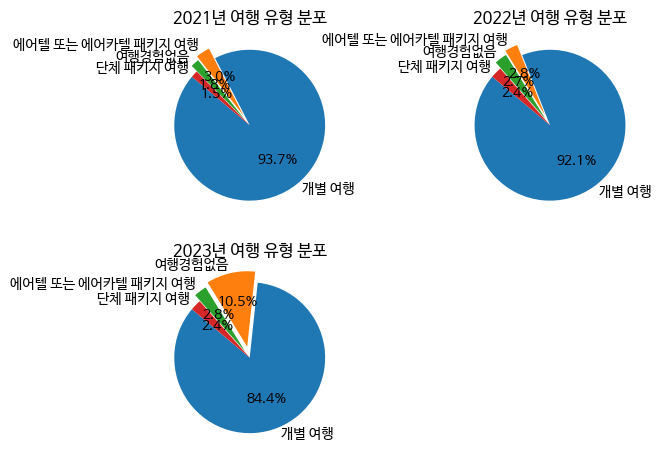

In [13]:
years = package_count_year.index.get_level_values('date_year').unique()
explode = [0, 0.15, 0.10, 0]
for year in years:
    data_year = package_count_year[year]
    labels = data_year.index
    sizes = data_year.values

    plt.subplot(2, 2, year - 2020)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
    plt.title(f'{year}년 여행 유형 분포')

plt.tight_layout()
plt.show()

- 패키지 여행 2021년 1.5% / 3.0% -> 2022년 2.4% / 2.7% -> 2023년 2.4% / 2.8% 로 점점 증가 추세

## 분석

In [26]:
package_valuecounts = package.groupby('date_year')['DMSTC_TOUR_TY_VALUE'].value_counts()
package_valuecounts = package_valuecounts.unstack()
package_valuecounts

DMSTC_TOUR_TY_VALUE,단체 패키지 여행,에어텔 또는 에어카텔 패키지 여행
date_year,,
2021,237,476
2022,446,510
2023,469,549


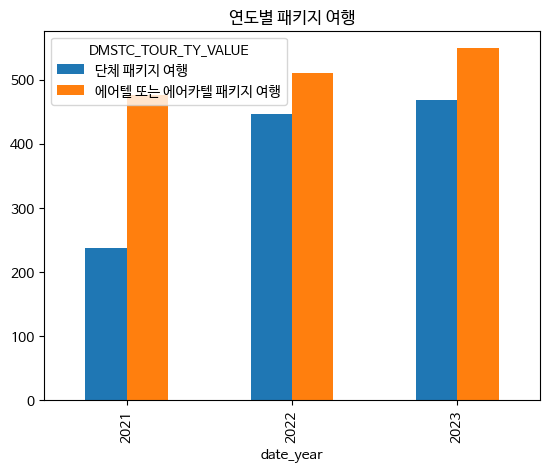

In [27]:
package_valuecounts.plot(kind='bar')
plt.title('연도별 패키지 여행')
plt.show()